# 1. Библиотеки

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

## 2. Простой пример: создание данных


In [10]:
# Генерация данных: y = 3*x + 7 + шум
np.random.seed(42)
X_simple = np.random.rand(100, 1) * 10  # значения от 0 до 10
y_simple = 3 * X_simple.flatten() + 7 + np.random.randn(100) * 2  # добавляем шум

print(f"Размер данных: {X_simple.shape}")

Размер данных: (100, 1)


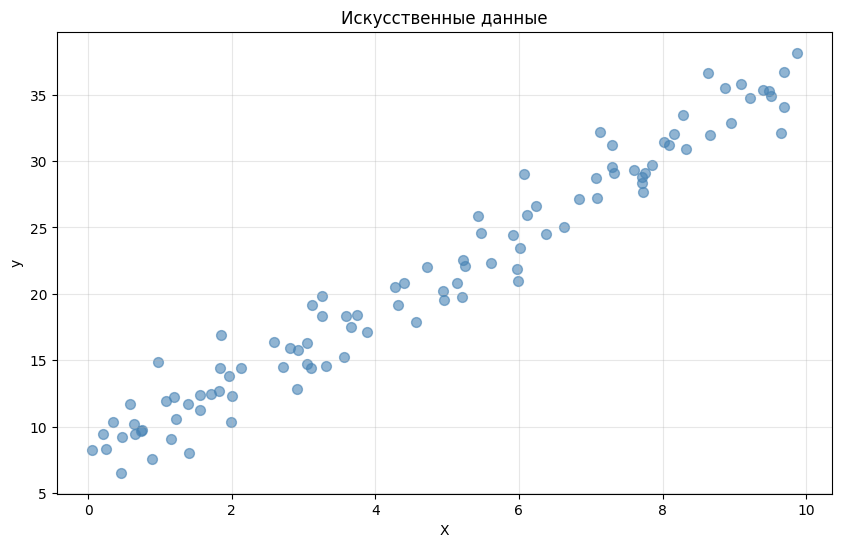

In [11]:
plt.figure(figsize=(10, 6))
plt.scatter(X_simple, y_simple, alpha=0.6, s=50, color='steelblue')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Искусственные данные')
plt.grid(alpha=0.3)
plt.show()

## 3. Реализация: Класс MyLinearRegression


In [12]:
class MyLinearRegression:
    """
    Линейная регрессия с градиентным спуском
    """
    
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        """
        Parameters:
        -----------
        learning_rate : float
            Скорость обучения (alpha)
        n_iterations : int
            Количество итераций обучения
        """
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.w0 = None  # intercept
        self.w1 = None  # coefficients
        self.loss_history = []  # история MSE
        
    def fit(self, X, y):
        """
        Обучение модели методом градиентного спуска
        
        Parameters:
        -----------
        X : array-like, shape (n_samples, n_features)
        y : array-like, shape (n_samples,)
        """        
        n_samples, n_features = X.shape
        self.w0 = 0
        self.w1 = np.zeros(n_features)
        
        # Градиентный спуск
        for i in range(self.n_iterations):
            # Предсказания
            y_pred = self.predict(X)
            
            # Вычисление MSE
            mse = np.mean((y - y_pred) ** 2)
            self.loss_history.append(mse)
            
            # Вычисление градиентов
            dw0 = -2 * np.mean(y - y_pred)
            dw1 = -2 * np.dot(X.T, (y - y_pred)) / n_samples
            
            # Обновление весов
            self.w0 = self.w0 - self.learning_rate * dw0
            self.w1 = self.w1 - self.learning_rate * dw1
            
        return self
    
    def predict(self, X):
        """
        Предсказание значений
        
        Parameters:
        -----------
        X : array-like, shape (n_samples, n_features)
        
        Returns:
        --------
        y_pred : array, shape (n_samples,)
        """
        return self.w0 + np.dot(X, self.w1)
    
    def get_params(self):
        """Возвращает параметры модели"""
        return {'intercept': self.w0, 'coefficients': self.w1}

## 4. Обучение нашей модели

In [14]:
# Создание и обучение модели
my_model = MyLinearRegression(learning_rate=0.01, n_iterations=1000)
my_model.fit(X_simple, y_simple)

# Получение параметров
params = my_model.get_params()
print(f"Наша модель:")
print(f"  w0 (intercept) = {params['intercept']:.4f}")
print(f"  w1 (coefficient) = {params['coefficients'][0]:.4f}")

Наша модель:
  w0 (intercept) = 7.4040
  w1 (coefficient) = 2.9121


## 5. Визуализация процесса обучения

График показывает, как MSE уменьшается с каждой итерацией.

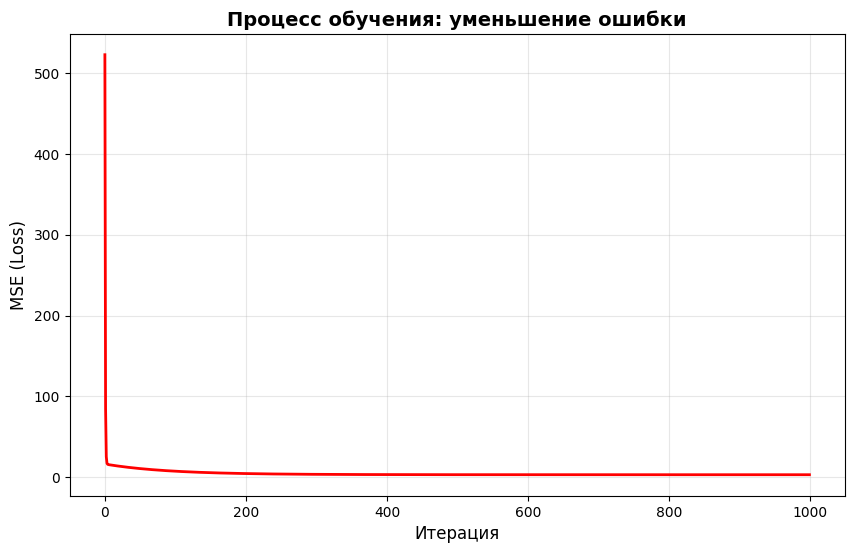

Начальная ошибка (MSE): 522.67
Финальная ошибка (MSE): 3.23
Улучшение: 99.4%


In [15]:
plt.figure(figsize=(10, 6))
plt.plot(my_model.loss_history, color='red', linewidth=2)
plt.xlabel('Итерация', fontsize=12)
plt.ylabel('MSE (Loss)', fontsize=12)
plt.title('Процесс обучения: уменьшение ошибки', fontsize=14, fontweight='bold')
plt.grid(alpha=0.3)
plt.show()

print(f"Начальная ошибка (MSE): {my_model.loss_history[0]:.2f}")
print(f"Финальная ошибка (MSE): {my_model.loss_history[-1]:.2f}")
print(f"Улучшение: {(1 - my_model.loss_history[-1]/my_model.loss_history[0])*100:.1f}%")

## 6. Визуализация результатов

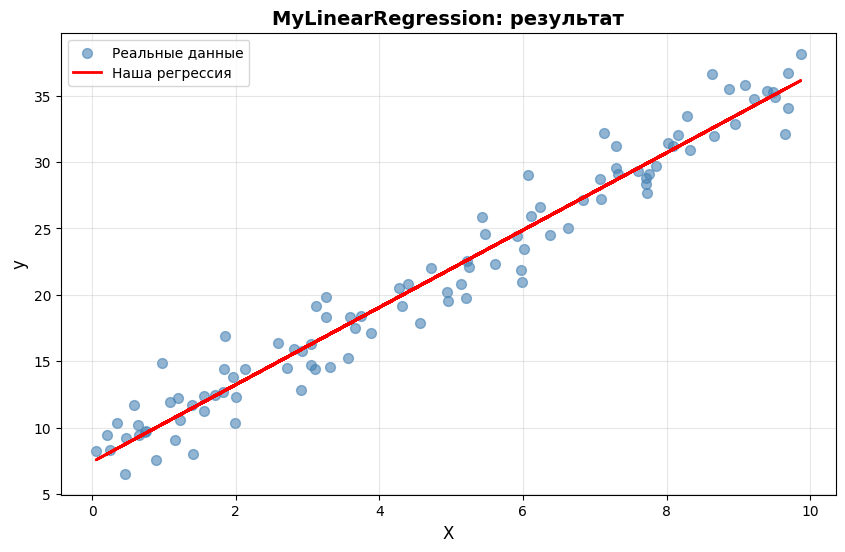

In [16]:
# Предсказания нашей модели
y_pred_my = my_model.predict(X_simple)

plt.figure(figsize=(10, 6))
plt.scatter(X_simple, y_simple, alpha=0.6, s=50, color='steelblue', label='Реальные данные')
plt.plot(X_simple, y_pred_my, color='red', linewidth=2, label='Наша регрессия')
plt.xlabel('X', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title('MyLinearRegression: результат', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

## 7. Сравнение с sklearn.LinearRegression

Проверим, что наша реализация даёт такой же результат!

In [18]:
# sklearn модель
sklearn_model = LinearRegression()
sklearn_model.fit(X_simple, y_simple)
y_pred_sklearn = sklearn_model.predict(X_simple)

print("Сравнение параметров:\n")
print(f"{'Модель':<20} {'Intercept (w0)':<20} {'Coefficient (w1)':<20}")
print("-" * 60)
print(f"{'MyLinearRegression':<20} {my_model.w0:<20.4f} {my_model.w1[0]:<20.4f}")
print(f"{'sklearn':<20} {sklearn_model.intercept_:<20.4f} {sklearn_model.coef_[0]:<20.4f}")

Сравнение параметров:

Модель               Intercept (w0)       Coefficient (w1)    
------------------------------------------------------------
MyLinearRegression   7.4040               2.9121              
sklearn              7.4302               2.9080              


In [19]:
# Сравнение метрик
r2_my = r2_score(y_simple, y_pred_my)
r2_sklearn = r2_score(y_simple, y_pred_sklearn)
mae_my = mean_absolute_error(y_simple, y_pred_my)
mae_sklearn = mean_absolute_error(y_simple, y_pred_sklearn)

print("\nСравнение метрик:\n")
print(f"{'Модель':<20} {'R²':<15} {'MAE':<15}")
print("-" * 50)
print(f"{'MyLinearRegression':<20} {r2_my:<15.6f} {mae_my:<15.4f}")
print(f"{'sklearn':<20} {r2_sklearn:<15.6f} {mae_sklearn:<15.4f}")


Сравнение метрик:

Модель               R²              MAE            
--------------------------------------------------
MyLinearRegression   0.958270        1.4037         
sklearn              0.958273        1.4021         


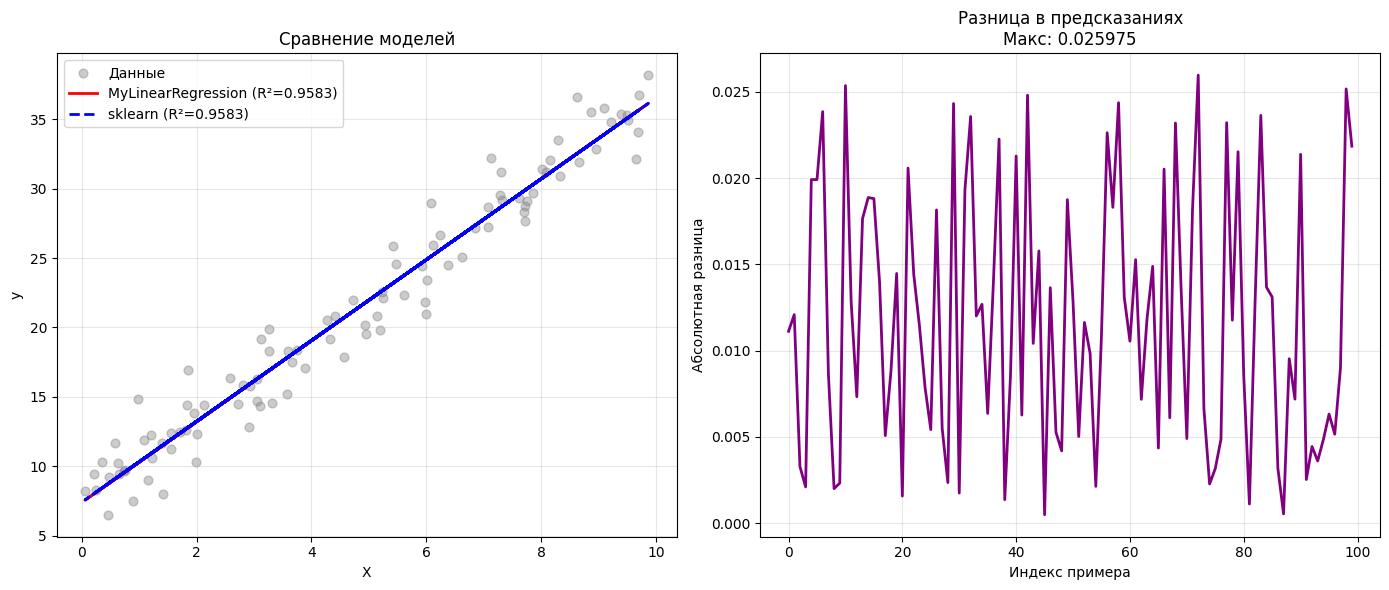

In [20]:
plt.figure(figsize=(14, 6))

# График 1: Обе модели
plt.subplot(1, 2, 1)
plt.scatter(X_simple, y_simple, alpha=0.4, s=40, color='gray', label='Данные')
plt.plot(X_simple, y_pred_my, color='red', linewidth=2, label=f'MyLinearRegression (R²={r2_my:.4f})')
plt.plot(X_simple, y_pred_sklearn, color='blue', linewidth=2, linestyle='--', label=f'sklearn (R²={r2_sklearn:.4f})')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Сравнение моделей')
plt.legend()
plt.grid(alpha=0.3)

# График 2: Разница в предсказаниях
plt.subplot(1, 2, 2)
diff = np.abs(y_pred_my - y_pred_sklearn)
plt.plot(diff, color='purple', linewidth=2)
plt.xlabel('Индекс примера')
plt.ylabel('Абсолютная разница')
plt.title(f'Разница в предсказаниях\nМакс: {diff.max():.6f}')
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

## 8. Множественная линейная регрессия

Теперь применим нашу модель к реальным данным с несколькими признаками!

In [21]:
# Загрузка California Housing
housing = fetch_california_housing()
df = pd.DataFrame(housing.data, columns=housing.feature_names)
df['MedHouseVal'] = housing.target

# Выбираем 2 признака для простоты визуализации
features = ['MedInc', 'AveRooms']
X_multi = df[features].values
y_multi = df['MedHouseVal'].values

# Нормализация данных (ВАЖНО для градиентного спуска!)
scaler = StandardScaler()
X_multi_scaled = scaler.fit_transform(X_multi)

print(f"Данные: {X_multi_scaled.shape[0]:,} домов")
print(f"Признаки: {features}")

Данные: 20,640 домов
Признаки: ['MedInc', 'AveRooms']


In [22]:
# Train/Test split
X_train, X_test, y_train, y_test = train_test_split(
    X_multi_scaled, y_multi, test_size=0.2, random_state=42
)

print(f"Train: {X_train.shape[0]:,} | Test: {X_test.shape[0]:,}")

Train: 16,512 | Test: 4,128


## 9. Обучение на реальных данных

In [24]:
# Наша модель
my_model_multi = MyLinearRegression(learning_rate=0.1, n_iterations=1000)
my_model_multi.fit(X_train, y_train)

# sklearn модель
sklearn_model_multi = LinearRegression()
sklearn_model_multi.fit(X_train, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


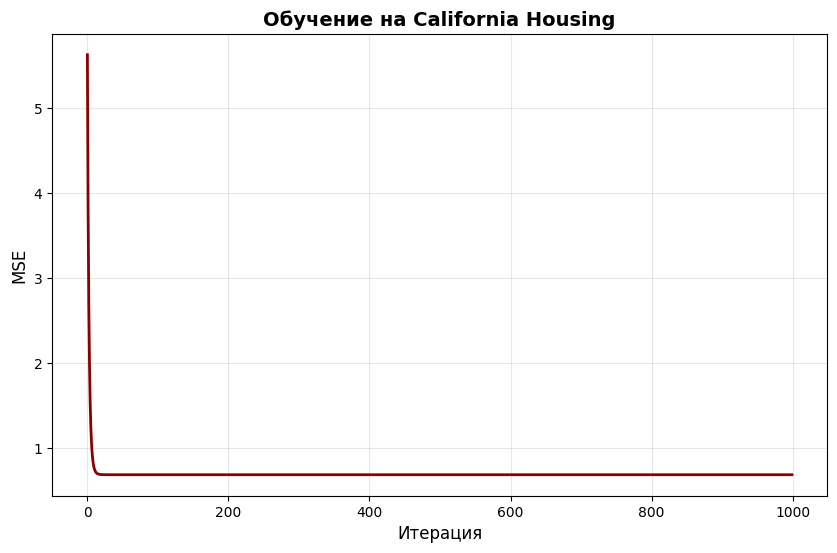

In [25]:
# График процесса обучения
plt.figure(figsize=(10, 6))
plt.plot(my_model_multi.loss_history, color='darkred', linewidth=2)
plt.xlabel('Итерация', fontsize=12)
plt.ylabel('MSE', fontsize=12)
plt.title('Обучение на California Housing', fontsize=14, fontweight='bold')
plt.grid(alpha=0.3)
plt.show()

## 10. Оценка на тестовых данных

In [26]:
# Предсказания
y_pred_my_multi = my_model_multi.predict(X_test)
y_pred_sklearn_multi = sklearn_model_multi.predict(X_test)

# Метрики
r2_my_multi = r2_score(y_test, y_pred_my_multi)
r2_sklearn_multi = r2_score(y_test, y_pred_sklearn_multi)
mae_my_multi = mean_absolute_error(y_test, y_pred_my_multi)
mae_sklearn_multi = mean_absolute_error(y_test, y_pred_sklearn_multi)

print("Результаты на тестовых данных:\n")
print(f"{'Модель':<20} {'R²':<15} {'MAE ($100k)':<15}")
print("-" * 50)
print(f"{'MyLinearRegression':<20} {r2_my_multi:<15.4f} {mae_my_multi:<15.4f}")
print(f"{'sklearn':<20} {r2_sklearn_multi:<15.4f} {mae_sklearn_multi:<15.4f}")
print(f"\nРазница в R²: {abs(r2_my_multi - r2_sklearn_multi):.6f}")

Результаты на тестовых данных:

Модель               R²              MAE ($100k)    
--------------------------------------------------
MyLinearRegression   0.4642          0.6247         
sklearn              0.4642          0.6247         

Разница в R²: 0.000000


In [ ]:
print("\nСравнение коэффициентов:\n")
print(f"{'Признак':<15} {'MyLinearRegression':<20} {'sklearn':<20}")
print("-" * 55)
print(f"{'Intercept':<15} {my_model_multi.w0:<20.4f} {sklearn_model_multi.intercept_:<20.4f}")
for i, feature in enumerate(features):
    print(f"{feature:<15} {my_model_multi.w1[i]:<20.4f} {sklearn_model_multi.coef_[i]:<20.4f}")


Сравнение коэффициентов:

Признак         MyLinearRegression   sklearn             
-------------------------------------------------------
Intercept       2.0678               2.0678              
MedInc          0.8288               0.8288              
AveRooms        -0.0994              -0.0994             


## 11. Визуализация: Predicted vs Actual

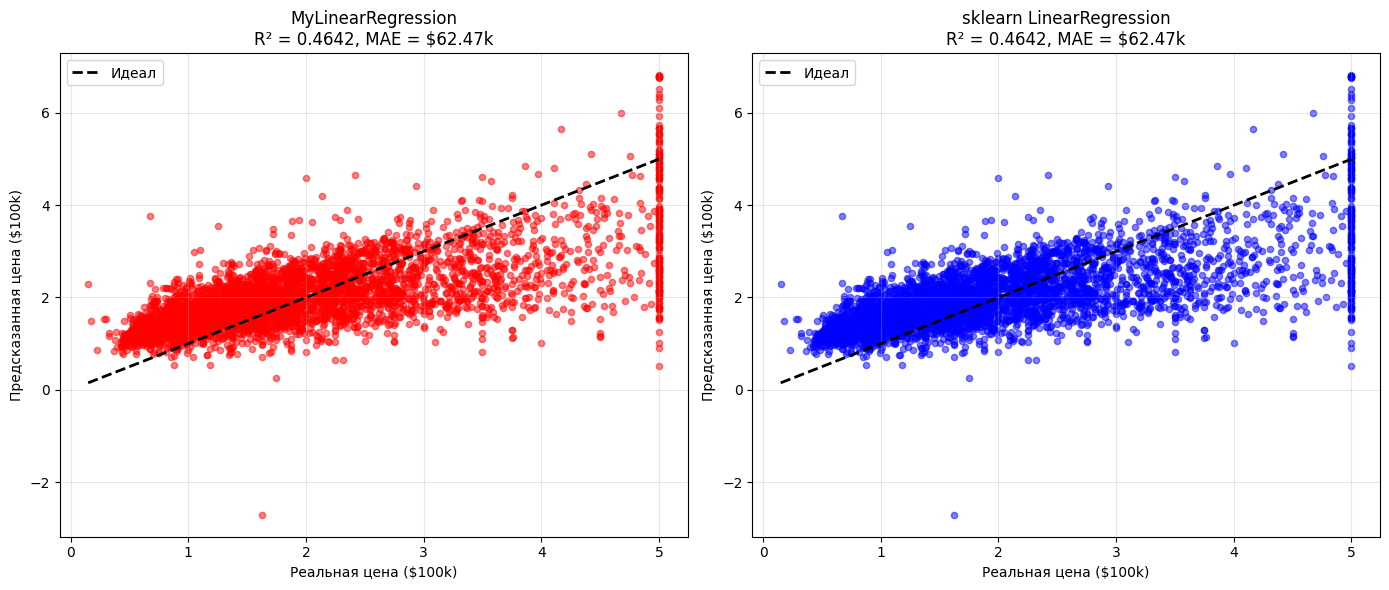

In [28]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# MyLinearRegression
axes[0].scatter(y_test, y_pred_my_multi, alpha=0.5, s=20, color='red')
axes[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 
             'k--', lw=2, label='Идеал')
axes[0].set_xlabel('Реальная цена ($100k)')
axes[0].set_ylabel('Предсказанная цена ($100k)')
axes[0].set_title(f'MyLinearRegression\nR² = {r2_my_multi:.4f}, MAE = ${mae_my_multi*100:.2f}k')
axes[0].legend()
axes[0].grid(alpha=0.3)

# sklearn
axes[1].scatter(y_test, y_pred_sklearn_multi, alpha=0.5, s=20, color='blue')
axes[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 
             'k--', lw=2, label='Идеал')
axes[1].set_xlabel('Реальная цена ($100k)')
axes[1].set_ylabel('Предсказанная цена ($100k)')
axes[1].set_title(f'sklearn LinearRegression\nR² = {r2_sklearn_multi:.4f}, MAE = ${mae_sklearn_multi*100:.2f}k')
axes[1].legend()
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

## 12. Эксперимент: влияние Learning Rate

Посмотрим, как скорость обучения влияет на результат.

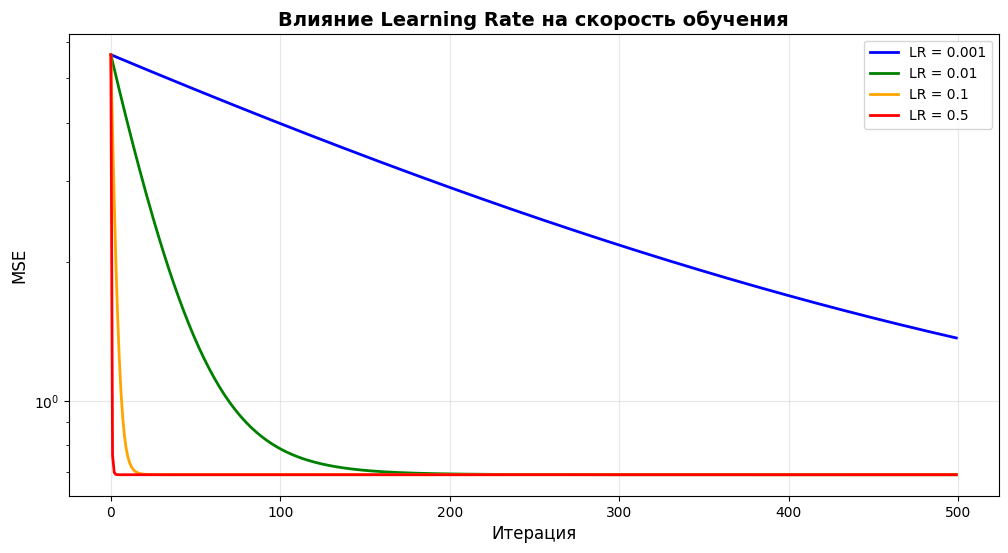

In [29]:
learning_rates = [0.001, 0.01, 0.1, 0.5]
colors = ['blue', 'green', 'orange', 'red']

plt.figure(figsize=(12, 6))

for lr, color in zip(learning_rates, colors):
    model_temp = MyLinearRegression(learning_rate=lr, n_iterations=500)
    model_temp.fit(X_train, y_train)
    plt.plot(model_temp.loss_history, color=color, linewidth=2, label=f'LR = {lr}')

plt.xlabel('Итерация', fontsize=12)
plt.ylabel('MSE', fontsize=12)
plt.title('Влияние Learning Rate на скорость обучения', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(alpha=0.3)
plt.yscale('log')  # логарифмическая шкала для лучшей видимости
plt.show()

---

# Задание

1. Попробовать разные значения `learning_rate` и `n_iterations`
2. Добавить больше признаков 
3. Сравнить результаты с и без масштабирования данных
4. Построить график изменения весов во время обучения